In [26]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
import librosa
import soundfile as sf


In [18]:
# Load the audio file
def audio_graph_plot(file_path):
    y, sr = librosa.load(file_path,sr=None) 
    # Takes the file path and Sampling Rate(sr), default sr=22050 and returns y(np.array of amplitude) , sr) 
#     print("Samples:",y)
#     print("Total Samples:",len(y))
#     print("Sampling rate:",sr)
    # Plot the waveform
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr) # displays waveform in time domain
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot the spectrogram
    plt.figure(figsize=(14, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    '''
    librosa.stft(y): Computes the Short-Time Fourier Transform of the audio signal,
    resulting in a complex-valued matrix representing the frequency content over time.

    np.abs(librosa.stft(y)): Converts the complex STFT matrix to a real-valued magnitude (amplitude) spectrum, 
    representing the strength of each frequency component over time.

    librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max): Converts the amplitude spectrum to a decibel (dB) scale using the maximum value as the reference, 
    normalizing the data and making it more suitable for visualization. 20log10(mag/ref)
    '''
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log') # Spectrogram Representation
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

Silenced Removed Audio


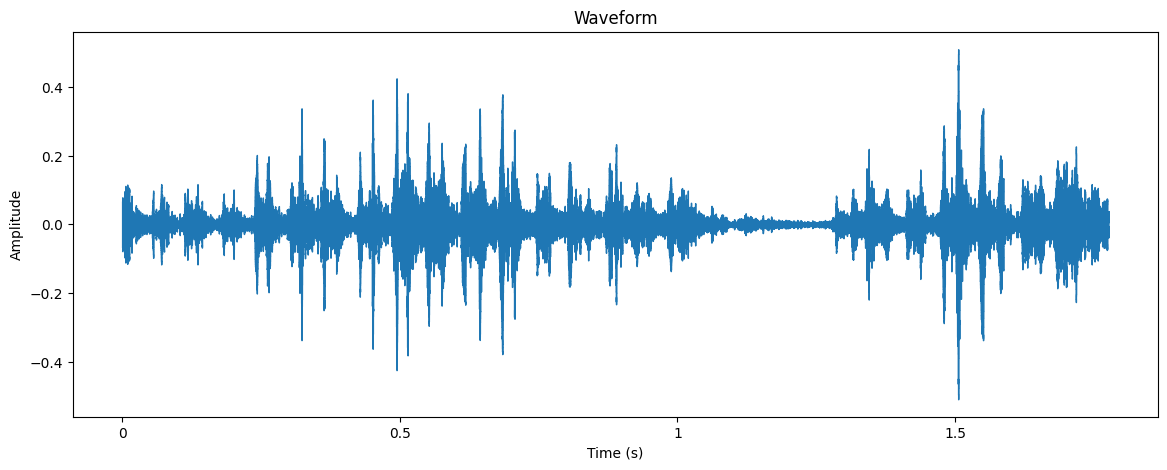

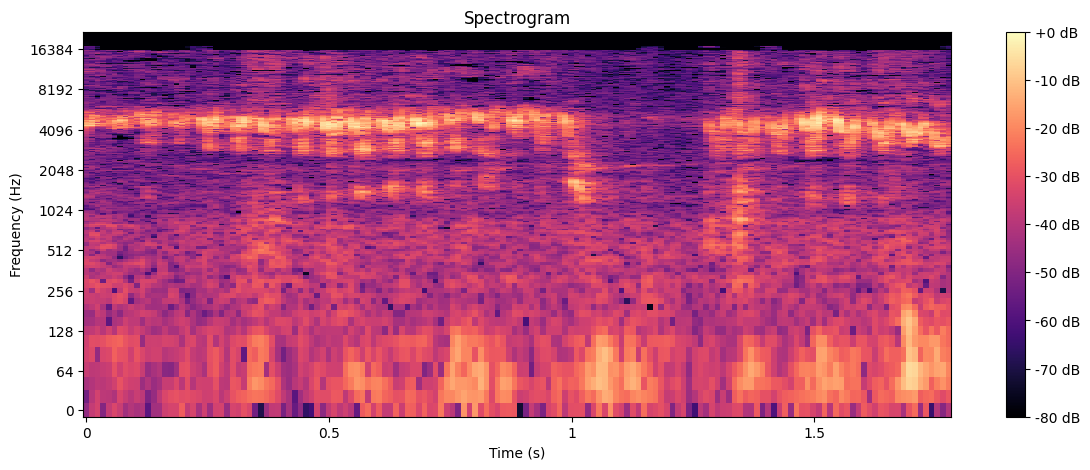

In [46]:
print("Silenced Removed Audio")
audio_graph_plot('/Users/khatiwadaprajwal22icloud.com/Desktop/Visual studio code/Audio_Preprocessing/Silence_Removal/cleaned_audio_librosa.mp3')

In [50]:

audio,sr = librosa.load('/Users/khatiwadaprajwal22icloud.com/Desktop/Visual studio code/Audio_Preprocessing/Silence_Removal/cleaned_audio_librosa.mp3',sr=None)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# band-pass filter
lowcut = 500.0  # 0.5 kHz
highcut = 9000.0  # 9 kHz

cleaned_audio = bandpass_filter(audio, lowcut, highcut, sr, order=6)

output_file_path_librosa = 'cleaned_audio_librosa.mp3'
sf.write(output_file_path_librosa, cleaned_audio, sr)
print(f"Original audio length: {len(audio)} samples")
print(f"Cleaned audio length: {len(cleaned_audio)} samples")

Original audio length: 78336 samples
Cleaned audio length: 78336 samples


Removed Background Noise


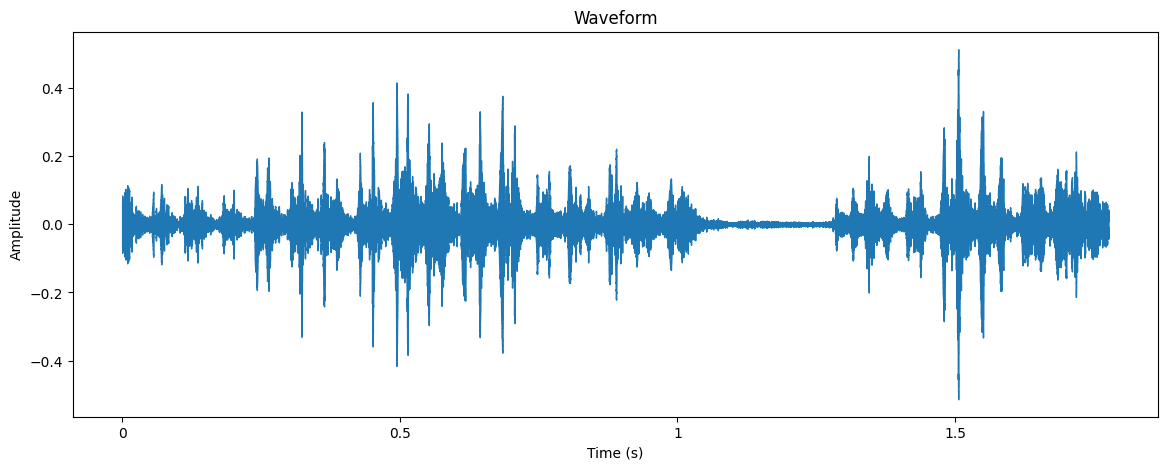

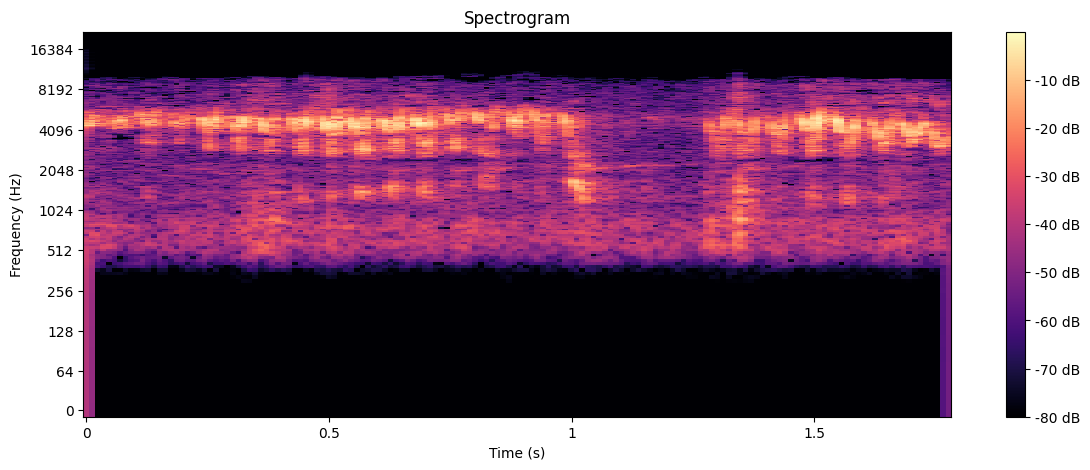

In [48]:
print("Removed Background Noise")
audio_graph_plot('cleaned_audio_librosa.mp3')